# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [ ]:
from sklearn.decomposition import TruncatedSVD

def apply_svd_custom(X_train, X_test, n_components):
    svd = TruncatedSVD(n_components=n_components)
    X_train_reduced = svd.fit_transform(X_train)
    X_test_reduced = svd.transform(X_test)

    return X_train_reduced, X_test_reduced, svd.components_

## Part 3: Train Logistic Regression and Measure Performance

In [ ]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [ ]:
svd_components = [300, 150, 100, 50]

# Store the results
results = []
singular_vectors = None

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, components_ = apply_svd_custom(X_train, X_test, n_components)

    # Store the top 5 singular vectors
    if singular_vectors is None and n_components >= 5:
        singular_vectors = components_[:5]

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Store the results
    results.append((n_components, accuracy, training_time))

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 300 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9211, Training time: 259.9513 seconds
Applying custom SVD with 150 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 150, Accuracy: 0.9196, Training time: 103.3100 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9179, Training time: 60.4977 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9099, Training time: 15.1812 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


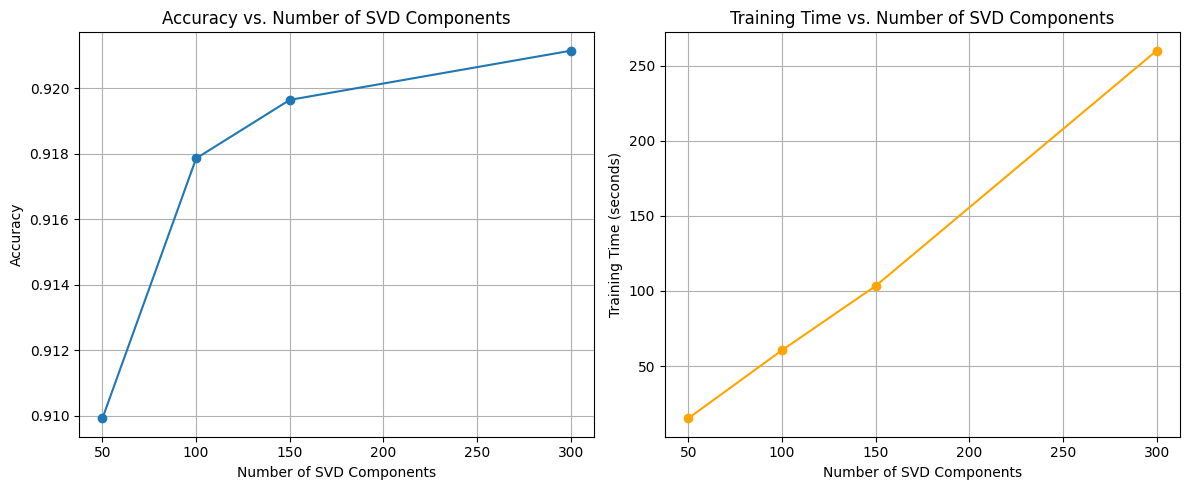

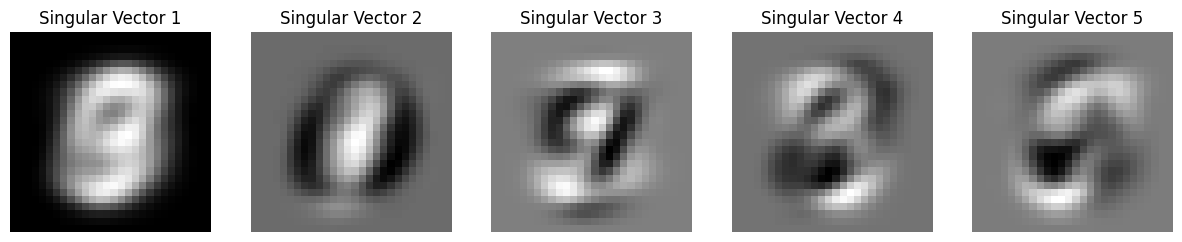

In [ ]:
# Convert results to numpy arrays for easy plotting
results_np = np.array(results)
components = results_np[:, 0]
accuracies = results_np[:, 1]
training_times = results_np[:, 2]

# Plot accuracy and training time as a function of number of SVD components
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot training time
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='orange')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize the top 5 singular vectors as 28x28 images
if singular_vectors is not None:
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        # Reshape singular vector to 28x28
        singular_image = singular_vectors[i].reshape(28, 28)

        # Display the image
        axs[i].imshow(singular_image, cmap='gray')
        axs[i].set_title(f"Singular Vector {i+1}")
        axs[i].axis('off')

    plt.show()

## Part 6: Analyze / Conclusion

**Trade-off Between Dimensionality and Accuracy:** As the number of SVD components decreases, the accuracy of the logistic regression model tends to decrease, especially when you reduce the dimensionality down to 50 components. This means that while some dimensions are essential, many features in the MNIST dataset are redundant or noisy. By keeping fewer but more meaningful dimensions, we can still retain a high level of accuracy while reducing computational complexity.

**Training Time and Dimensionality:** Similar to previous observation, the training time will decreases as the number of components decreases. With fewer features to process, logistic regression models are faster to train. This shows the benefit of dimensionality reduction in practical machine learning scenarios, where computational resources and time are often limited. Reducing the number of features significantly speeds up model training, making it feasible to train models faster while still maintaining reasonable accuracy.

**Top 5 Singular Vectors:** Singular vectors highlight the fact that SVD captures the most significant patterns in the dataset, which are typically the ones that hold the most important information for classification tasks. This explains why logistic regression still performs well with reduced dimensions.

**Bias-Variance Trade-off:** Reducing the number of components to around 100-150 often maintains a balance between accuracy and training time. For instance, with 100 components, you may experience a slight dip in accuracy compared to using 300 components, but the model trains significantly faster.